In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import functools
from functools import reduce
import time
import sys
import math

In [ ]:
#only needed if load_windgps_data_to_pandas and process_windgps_data are not in the current directory
sys.path.append('/Users/Downloads/gps_wind_station-master') # add path where the following python modules live

In [2]:
import load_windgps_data_to_pandas
import process_windgps_data

In [3]:
def latlon_to_xyz(lat,lon):
    """Convert angluar to cartesian coordiantes

    latitude is the 90deg - zenith angle in range [-90;90]
    lonitude is the azimuthal angle in range [-180;180] 
    """
    r = 6371 # https://en.wikipedia.org/wiki/Earth_radius
    theta = math.pi/2 - math.radians(lat) 
    phi = math.radians(lon)
    x = r * math.sin(theta) * math.cos(phi) # bronstein (3.381a)
    y = r * math.sin(theta) * math.sin(phi)
    z = r * math.cos(theta)
    return [x,y,z]

In [4]:
# where your binary data files are
data_directoryA = 'example_raw_data_7.7.21/A/'
data_directoryB = 'example_raw_data_7.7.21/B/'
data_directoryC = 'example_raw_data_7.7.21/C/'
data_directoryD = 'example_raw_data_7.7.21/D/'
data_directoryE = 'example_raw_data_7.7.21/E/'
data_directoryF = 'example_raw_data_7.7.21/F/'
data_directoryG = 'example_raw_data_7.7.21/G/'
data_directoryH = 'example_raw_data_7.7.21/H/'
data_directoryI = 'example_raw_data_7.7.21/I/'

In [5]:
correct_year = 2021
out = '.' # in this directory

In [6]:
df1 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryA)
df2 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryB)
df3 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryC)
df4 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryD)
df5 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryE)
df6 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryF)
df7 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryG)
df8 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryH)
df9 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryI)

Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484


In [7]:
alldfs=[df1,df2, df3, df4,df5,df6,df7,df8,df9]

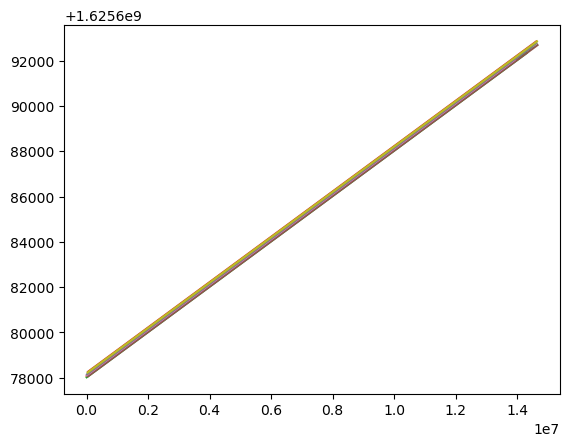

In [8]:
#fix any time errors
for i in range(0,len(alldfs)):
    alldfs[i] = process_windgps_data.fix_millis_errors(alldfs[i])
    alldfs[i] = process_windgps_data.fix_gps_date(alldfs[i], correct_year=correct_year)
    alldfs[i] = process_windgps_data.calc_interpolated_epoch_time(alldfs[i])
    plt.plot(alldfs[i].millis, alldfs[i].time_epoch)

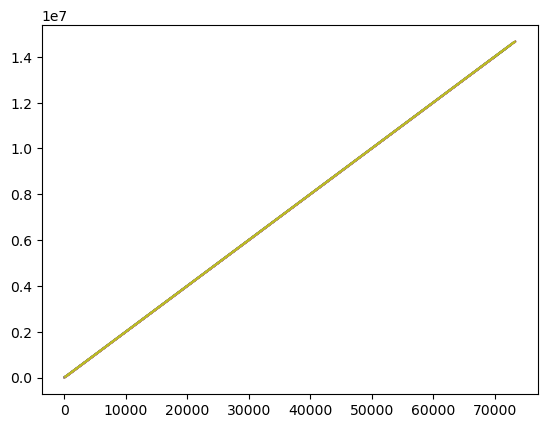

In [9]:
#fix any time errors
for i in range(0,len(alldfs)):
    #alldfs[i] = process_windgps_data.fix_millis_errors(alldfs[i])
    #alldfs[i] = process_windgps_data.fix_gps_date(alldfs[i], correct_year=correct_year)
    #alldfs[i] = process_windgps_data.calc_interpolated_epoch_time(alldfs[i])
    plt.plot(alldfs[i].millis)

In [10]:
for i in range (0, len(alldfs)):
    print(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(alldfs[i].time_epoch.iloc[0])))

2021-07-07 10:15:49
2021-07-07 10:14:30
2021-07-07 10:13:40
2021-07-07 10:17:48
2021-07-07 10:15:13
2021-07-07 10:14:24
2021-07-07 10:15:10
2021-07-07 10:15:50
2021-07-07 10:17:16


In [11]:
#create separate columns for speed, direction,etc.
for i in range(0,len(alldfs)):
    alldfs[i] = process_windgps_data.parse_and_save_several_wind_strings(alldfs[i], wind_strings=['S2', 'D', 'T', 'U', 'V', 'W'])


In [12]:
#convert lat,lon cords to x,y,z
for i in range(0,len(alldfs)):
    x,y,z=latlon_to_xyz(np.array(alldfs[i].lat.mode()), np.array(alldfs[i].lon.mode()))
    alldfs[i]['X']=x
    alldfs[i]['Y']=y
    alldfs[i]['Z']=z

In [13]:
#save files as separate hdfs
names=['SensorA','SensorB', 'SensorC', 'SensorD', 'SensorE', 'SensorF', 'SensorG', 'SensorH', 'SensorI']
for i in range(0,len(alldfs)):
    alldfs[i].to_hdf(names[i] + '_7.7.21', key='/windgps')


/var/folders/0c/q32x1j5s1zqg0747td81nt840000gn/T/ipykernel_57629/1920909337.py:4: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['wind', 'gps_date_str', 'gps_time_str'], dtype='object')]

  alldfs[i].to_hdf(names[i] + '_7.7.21', key='/windgps')


In [14]:
#read in hdfs
df1=pd.read_hdf('SensorA_7.7.21')
df2=pd.read_hdf('SensorB_7.7.21')
df3=pd.read_hdf('SensorC_7.7.21')
df4=pd.read_hdf('SensorD_7.7.21')
df5=pd.read_hdf('SensorE_7.7.21')
df6=pd.read_hdf('SensorF_7.7.21')
df7=pd.read_hdf('SensorG_7.7.21')
df8=pd.read_hdf('SensorH_7.7.21')
df9=pd.read_hdf('SensorI_7.7.21')
df1

,millis,lat,lon,gps_time,gps_date,wind,gps_date_str,year,month,day,...,time_epoch,S2,D,T,U,V,W,X,Y,Z
115,22972,1000.000000,1000.000000,171552,70721,b'\nS2 02.654 D 241 U 02.317 V 01.294 W 0...,070721,2021.0,7.0,7.0,...,1.625678e+09,2.654,241.0,23.40,2.317,1.294,0.052,-2457.653527,-4277.76059,4031.1716
116,23072,1000.000000,1000.000000,171552,70721,b'\nS2 02.882 D 236 U 02.390 V 01.611 W -0...,070721,2021.0,7.0,7.0,...,1.625678e+09,2.882,236.0,23.33,2.390,1.611,-0.023,-2457.653527,-4277.76059,4031.1716
117,23172,1000.000000,1000.000000,171552,70721,b'\nS2 02.895 D 232 U 02.279 V 01.785 W 0...,070721,2021.0,7.0,7.0,...,1.625678e+09,2.895,232.0,23.34,2.279,1.785,0.047,-2457.653527,-4277.76059,4031.1716
118,23272,1000.000000,1000.000000,171552,70721,b'\nS2 03.068 D 230 U 02.361 V 01.958 W 0...,070721,2021.0,7.0,7.0,...,1.625678e+09,3.068,230.0,23.44,2.361,1.958,0.059,-2457.653527,-4277.76059,4031.1716
119,23372,1000.000000,1000.000000,171552,70721,b'\nS2 02.930 D 231 U 02.265 V 01.857 W 0...,070721,2021.0,7.0,7.0,...,1.625678e+09,2.930,231.0,23.41,2.265,1.857,0.100,-2457.653527,-4277.76059,4031.1716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72485,14486595,39.252419,-119.878304,211653,70721,b'\nS2 01.428 D 155 U -00.598 V 01.296 W 0...,070721,2021.0,7.0,7.0,...,1.625693e+09,1.428,155.0,24.60,-0.598,1.296,0.245,-2457.653527,-4277.76059,4031.1716
72486,14486695,39.252419,-119.878304,211654,70721,b'\nS2 01.620 D 161 U -00.523 V 01.533 W 0...,070721,2021.0,7.0,7.0,...,1.625693e+09,1.620,161.0,24.23,-0.523,1.533,0.292,-2457.653527,-4277.76059,4031.1716
72487,14486795,39.252419,-119.878304,211654,70721,b'\nS2 01.354 D 151 U -00.667 V 01.179 W 0...,070721,2021.0,7.0,7.0,...,1.625693e+09,1.354,151.0,24.26,-0.667,1.179,0.584,-2457.653527,-4277.76059,4031.1716
72488,14486895,39.252419,-119.878304,211654,70721,b'\nS2 01.301 D 143 U -00.778 V 01.043 W 0...,070721,2021.0,7.0,7.0,...,1.625693e+09,1.301,143.0,24.44,-0.778,1.043,0.387,-2457.653527,-4277.76059,4031.1716


In [15]:
#ADD suffixes to each DF for all values except time_epoch

df1=df1.add_suffix('_1')
df1=df1.rename(columns={"time_epoch_1":"time"})

df2=df2.add_suffix('_2')
df2=df2.rename(columns={"time_epoch_2":"time"})

df3=df3.add_suffix('_3')
df3=df3.rename(columns={"time_epoch_3":"time"})

df4=df4.add_suffix('_4_verticallyorientated')
df4=df4.rename(columns={"time_epoch_4_verticallyorientated":"time"})

df5=df5.add_suffix('_5')
df5=df5.rename(columns={"time_epoch_5":"time"})

df6=df6.add_suffix('_6')
df6=df6.rename(columns={"time_epoch_6":"time"})

df7=df7.add_suffix('_7_verticallyorientated')
df7=df7.rename(columns={"time_epoch_7_verticallyorientated":"time"})

df8=df8.add_suffix('_8')
df8=df8.rename(columns={"time_epoch_8":"time"})

df9=df9.add_suffix('_9')
df9=df9.rename(columns={"time_epoch_9":"time"})

In [16]:
#round all dfs to 1 decimal (their sampling rate)
decimals = 1
df1['time'] = df1['time'].apply(lambda x: round(x, decimals))
df2['time'] = df1['time'].apply(lambda x: round(x, decimals))
df3['time'] = df1['time'].apply(lambda x: round(x, decimals))
df4['time'] = df1['time'].apply(lambda x: round(x, decimals))
df5['time'] = df1['time'].apply(lambda x: round(x, decimals))
df6['time'] = df1['time'].apply(lambda x: round(x, decimals))
df7['time'] = df1['time'].apply(lambda x: round(x, decimals))
df8['time'] = df1['time'].apply(lambda x: round(x, decimals))
df9['time'] = df1['time'].apply(lambda x: round(x, decimals))



In [17]:
dfs=[df1,df2,df3,df4,df5,df6,df7,df8,df9]

In [18]:
df_merged = reduce(lambda  left, right: pd.merge(left, right, on=['time'],
                                            how='inner'), dfs)

In [19]:
df_merged

,millis_1,lat_1,lon_1,gps_time_1,gps_date_1,wind_1,gps_date_str_1,year_1,month_1,day_1,...,second_9,S2_9,D_9,T_9,U_9,V_9,W_9,X_9,Y_9,Z_9
0,44472,1000.000000,1000.000000,171613,70721,b'\nS2 02.792 D 273 U 02.788 V -00.158 W -0...,070721,2021.0,7.0,7.0,...,33,1.72,290.0,25.20,1.61,-0.60,-0.08,-2457.654772,-4277.786495,4031.143352
1,44572,1000.000000,1000.000000,171613,70721,b'\nS2 02.953 D 271 U 02.953 V -00.056 W -0...,070721,2021.0,7.0,7.0,...,33,1.73,291.0,25.15,1.61,-0.62,-0.14,-2457.654772,-4277.786495,4031.143352
2,44672,1000.000000,1000.000000,171613,70721,b'\nS2 02.965 D 267 U 02.961 V 00.141 W -0...,070721,2021.0,7.0,7.0,...,33,1.61,283.0,25.21,1.58,-0.35,-0.04,-2457.654772,-4277.786495,4031.143352
3,44772,1000.000000,1000.000000,171613,70721,b'\nS2 03.078 D 264 U 03.059 V 00.335 W -0...,070721,2021.0,7.0,7.0,...,33,1.72,277.0,25.18,1.71,-0.22,-0.14,-2457.654772,-4277.786495,4031.143352
4,44872,1000.000000,1000.000000,171613,70721,b'\nS2 03.123 D 264 U 03.107 V 00.320 W -0...,070721,2021.0,7.0,7.0,...,33,1.75,277.0,25.19,1.73,-0.21,-0.05,-2457.654772,-4277.786495,4031.143352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69405,13914612,39.252399,-119.878181,210721,70721,b'\nS2 00.408 D 270 U 00.408 V -00.002 W -0...,070721,2021.0,7.0,7.0,...,18,0.53,303.0,26.11,0.45,-0.29,0.14,-2457.654772,-4277.786495,4031.143352
69406,13914712,39.252396,-119.878189,210722,70721,b'\nS2 00.499 D 270 U 00.499 V 00.001 W 0...,070721,2021.0,7.0,7.0,...,18,0.42,293.0,26.19,0.38,-0.16,0.20,-2457.654772,-4277.786495,4031.143352
69407,13914812,39.252396,-119.878189,210722,70721,b'\nS2 00.643 D 271 U 00.643 V -00.013 W 0...,070721,2021.0,7.0,7.0,...,18,0.48,304.0,26.12,0.40,-0.27,0.20,-2457.654772,-4277.786495,4031.143352
69408,13914912,39.252396,-119.878189,210722,70721,b'\nS2 00.562 D 284 U 00.545 V -00.140 W 0...,070721,2021.0,7.0,7.0,...,18,0.41,291.0,26.20,0.38,-0.14,0.18,-2457.654772,-4277.786495,4031.143352


In [20]:
dt_wind = np.median(np.diff(df_merged.time.dropna().values))
print('dt Wind: ', dt_wind)

first_time = np.min([df_merged.time])
last_time = np.max([df_merged.time])
print(first_time,last_time)
master_time = np.arange(first_time, last_time, dt_wind)


dt Wind:  0.09999990463256836
1625678171.4 1625692042.3


In [21]:
df_merged.to_hdf('example_raw_data_7.7.21/Merged_7.7.21.hdf', key='/windgps')

# merged file is too large for this github repo, but can be found on Figshare

/var/folders/0c/q32x1j5s1zqg0747td81nt840000gn/T/ipykernel_57629/2983783625.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['wind_1', 'gps_date_str_1', 'gps_time_str_1', 'wind_2',
       'gps_date_str_2', 'gps_time_str_2', 'wind_3', 'gps_date_str_3',
       'gps_time_str_3', 'wind_4_verticallyorientated',
       'gps_date_str_4_verticallyorientated',
       'gps_time_str_4_verticallyorientated', 'wind_5', 'gps_date_str_5',
       'gps_time_str_5', 'wind_6', 'gps_date_str_6', 'gps_time_str_6',
       'wind_7_verticallyorientated', 'gps_date_str_7_verticallyorientated',
       'gps_time_str_7_verticallyorientated', 'wind_8', 'gps_date_str_8',
       'gps_time_str_8', 'wind_9', 'gps_date_str_9', 'gps_time_str_9'],
      dtype='object')]

  df_merged.to_hdf('Merged_7.7.21.hdf', key='/windgps')
